# -----------------------------Amazon Mobile Phones Dataset-----------------------------------

In [1]:
#Importing Important modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading file
data = pd.read_csv("Amazon Mobile dataset.zip")

In [3]:
#Showing starting 5 rows of dataset
data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [4]:
#Shape of data
data.shape

(413840, 6)

In [5]:
#Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
Product Name    413840 non-null object
Brand Name      348669 non-null object
Price           407907 non-null float64
Rating          413840 non-null int64
Reviews         413778 non-null object
Review Votes    401544 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [6]:
#Checking for N/A's
data.isnull().sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            62
Review Votes    12296
dtype: int64

In [7]:
#Dropping N/A's
data.dropna(inplace=True)

In [8]:
#Checking Shape of data
data.shape

(334335, 6)

In [9]:
#Removing neutral rating or average rating equal to 3 from the dataset 
data = data[data['Rating'] != 3]

In [10]:
# Encoding rating 4 and 5 with positive 1
# Encoding rating 1 and 2 with negative 0
data['Sentiment_rated'] = np.where(data['Rating'] > 3, 1, 0)
data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Sentiment_rated
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,1
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,1


In [11]:
data['Brand Name'].value_counts()

Samsung         58857
BLU             53929
Apple           53258
LG              19979
BlackBerry      15235
                ...  
RomaCostume         1
UHAPPY              1
Android             1
ToShare Tech        1
S7 active           1
Name: Brand Name, Length: 376, dtype: int64

In [19]:
# most ratings are positive
positive = data['Sentiment_rated'].mean()
print("Positive Sentiments Percentage ", positive*100 )

#Ratings are negative
print("Negative Sentiments Percentage ", (100 - positive*100) )

Positive Sentiments Percentage  74.82686025879323
Negative Sentiments Percentage  25.173139741206768


In [20]:
from sklearn.model_selection import train_test_split

X = data['Reviews']
y = data['Sentiment_rated']

#spliting data into training and test set.
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
print('X_train first entry:\n',X_train.iloc[0])
print('\nX_train shape',X_train.shape)

X_train first entry:
 I bought a BB Black and was deliveried a White BB.Really is not a serious provider...Next time is better to cancel the order.

X_train shape (231207,)


In [21]:
data['Sentiment_rated'].value_counts()

1    230674
0     77603
Name: Sentiment_rated, dtype: int64

### Count Vectorizer

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

#fitting the count-vectorizer in the training data
vector = CountVectorizer()
vector.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [25]:
#getting every 2000 vocabulay features.
vector.get_feature_names()[::2000]

['00',
 '4less',
 'adr6275',
 'assignment',
 'blazingly',
 'cassettes',
 'condishion',
 'debi',
 'dollarsshipping',
 'esteem',
 'flashy',
 'gorila',
 'human',
 'irullu',
 'like',
 'microsaudered',
 'nightmarish',
 'p770',
 'poori',
 'quirky',
 'responseive',
 'send',
 'sos',
 'synch',
 'trace',
 'utiles',
 'withstanding']

In [27]:
#Length of feature names
len(vector.get_feature_names())

53216

In [28]:
#transform the document in the training data to a document term matrix.
X_train_vectorized = vector.transform(X_train)
X_train_vectorized

<231207x53216 sparse matrix of type '<class 'numpy.int64'>'
	with 6117776 stored elements in Compressed Sparse Row format>

In [29]:
from sklearn.linear_model import LogisticRegression
#train the model.
model = LogisticRegression()
model.fit(X_train_vectorized,y_train)

F:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
from sklearn.metrics import roc_auc_score,roc_curve

#predict the transform test document.
predictions = model.predict(vector.transform(X_test))
print('AUC: ',roc_auc_score(y_test,predictions))

AUC:  0.9206104942478054


In [32]:
#get the feature names as numpy array.
feature_names = np.array(vector.get_feature_names())

#sort the coffecient from the model.
sorted_coef_index = model.coef_[0].argsort()

'''Finding the 20 smallest and 20 largest coefficients here.
 The 20 largest coefficients are being indexed using [:-21:-1] 
 so the list returned is in order of largest to smallest.'''

print('Smallest Coefficient(Negative reviews): \n{}\n'.format(feature_names[sorted_coef_index[:20]]))
print('Largest Coeffiecient(Positive reviews): \n{}'.format(feature_names[sorted_coef_index[:-21:-1]]))

Smallest Coefficient(Negative reviews): 
['worst' 'garbage' 'junk' 'unusable' 'false' 'worthless' 'useless'
 'crashing' 'disappointing' 'awful' 'scam' 'heats' 'wasted' 'empty' 'luck'
 'dissatisfied' 'worse' 'poor' 'horrible' 'freezes']

Largest Coeffiecient(Positive reviews): 
['excelent' 'excelente' 'exelente' 'loving' 'loves' 'perfecto' 'excellent'
 'complaints' 'awesome' 'buen' 'bien' 'perfect' 'superb' 'love' 'amazing'
 'lovely' 'exelent' 'fantastic' 'flawlessly' 'wonderful']


### TF-IDF (Term Frequency - Inverse Document Frequency)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df=5).fit(X_train)

#Length of Feature_names
len(vect.get_feature_names())

17951

In [34]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

F:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AUC:  0.9265848398605042


In [35]:
feature_names = np.array(vect.get_feature_names())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:20]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-21:-1]]))

Smallest tfidf:
['commenter' 'pthalo' 'warmness' 'storageso' 'aggregration' '1300'
 '625nits' 'a10' 'submarket' 'brawns' '700nits' 'srgb' 'abreast'
 'bridging' '34ghz' '401p' '___thank' 'resins' '___update' '16nm']

Largest tfidf: 
['defective' 'batteries' 'gooood' 'epic' 'luis' 'goood' 'basico'
 'aceptable' 'problems' 'excellant' 'goog' 'machete' 'goodyear' 'machine'
 'superior' 'goods' 'enjoying' '5stars' 'excelled' 'batter']


In [36]:
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:20]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-21:-1]]))

Smallest Coefs:
['not' 'worst' 'useless' 'disappointed' 'terrible' 'return' 'waste' 'poor'
 'horrible' 'doesn' 'junk' 'slow' 'freezes' 'stopped' 'returning'
 'garbage' 'wouldn' 'don' 'cannot' 'unusable']

Largest Coefs: 
['love' 'great' 'excellent' 'perfect' 'amazing' 'awesome' 'perfectly'
 'easy' 'best' 'loves' 'far' 'exactly' 'good' 'excelent' 'complaints'
 'pleased' 'excelente' 'fast' 'nice' 'fantastic']


In [37]:
#These reviews are treated the same by our current model
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[0 0]


### N-grams

In [38]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

198917

In [39]:
#Fitting Logistic Regression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

F:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AUC:  0.9588716211702142


In [40]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:20]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-21:-1]]))

Smallest Coefs:
['no good' 'not happy' 'not worth' 'junk' 'worst' 'not satisfied'
 'garbage' 'not good' 'defective' 'terrible' 'very bad' 'horrible'
 'useless' 'poor' 'not very' 'at best' 'didn like' 'disappointed' 'awful'
 'nope']

Largest Coefs: 
['excelent' 'excelente' 'excellent' 'not bad' 'exelente' 'perfect'
 'awesome' 'no problems' 'no issues' 'perfecto' 'great' 'loves' 'amazing'
 'love' 'loving' 'best' 'no problem' 'wonderful' 'not too' 'exelent']


In [41]:
# These reviews are now correctly identified
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[1 0]


In [42]:
# These reviews are now correctly identified
print(model.predict(vect.transform(['disappointed, phone working very badly',
                                    'I am satisfied with the phone'])))

[0 1]


### * *When we are using Tf-Idf vectorizer, the model is not predicting correctly the new reviews but using n-grams, model correctly identifying the new reviews.* *

## Plotting Sentiment column

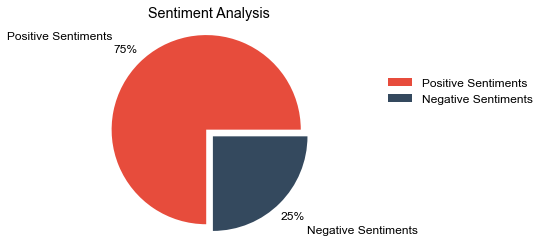

In [61]:
color_palette_list = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12
labels = ['Positive Sentiments', 
         'Negative Sentiments']
percentages = [75,25]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels,  
       colors=color_palette_list[3:5], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Sentiment Analysis")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

## Word2Vec 

In [70]:
import re
from gensim.test.utils import get_tmpfile
from gensim.models.doc2vec import TaggedDocument, LabeledSentence
from gensim.models import Doc2Vec, word2vec
from gensim import utils

In [63]:
pip install --upgrade gensim

  Created wheel for smart-open: filename=smart_open-2.1.0-cp37-none-any.whl size=110325 sha256=e1d1817cf1c2d638f5f1b23f7931f493b3b821bf286c764d8ca9b532eae53cd9
  Stored in directory: C:\Users\anushka singh\AppData\Local\pip\Cache\wheels\25\6c\db\7dcb26f19fb260c5629af85ed1c8ef9641143444fc7ec1fa08
Successfully built smart-open
  Found existing installation: Cython 0.29.13
    Uninstalling Cython-0.29.13:
      Successfully uninstalled Cython-0.29.13
Note: you may need to restart the kernel to use updated packages.


In [78]:
from bs4 import BeautifulSoup 

In [79]:
# This function converts a text to a sequence of words.
def review_wordlist(review, remove_stopwords=False):
    # 1. Removing html tags
    review_text = BeautifulSoup(review).get_text()
    # 2. Removing non-letter.
    review_text = re.sub("[^a-zA-Z]"," ",review_text)
    # 3. Converting to lower case and splitting
    words = review_text.lower().split()
    # 4. Optionally remove stopwords
    if remove_stopwords:
        stops = set(stopwords.words("english"))     
        words = [w for w in words if not w in stops]
    
    return(words)

In [80]:
# word2vec expects a list of lists.
# Using punkt tokenizer for better splitting of a paragraph into sentences.

import nltk.data
#nltk.download('popular')

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [81]:
# This function splits a review into sentences
def review_sentences(review, tokenizer, remove_stopwords=False):
    # 1. Using nltk tokenizer
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    # 2. Loop for each sentence
    for raw_sentence in raw_sentences:
        if len(raw_sentence)>0:
            sentences.append(review_wordlist(raw_sentence,\
                                            remove_stopwords))

    # This returns the list of lists
    return sentences

In [82]:
sentences = []
print("Parsing sentences from training set")
for review in data["Reviews"]:
    sentences += review_sentences(review, tokenizer)

Parsing sentences from training set


F:\anaconda\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
F:\anaconda\lib\site-packages\bs4\__init__.py:357: UserWarning: "http://www.amazon.com/gp/product/B00PEJQU9M?redirect=true&ref_=cm_cr_ryp_prd_ttl_sol_0" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
F:\anaconda\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'...'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
F:\anaconda\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'..... ... ... ... .. .... ... .. .... .. ..... .... ..... .... .'" looks like a filename, not markup. 

F:\anaconda\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'.................. ................ ................ .............. ............. .'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
F:\anaconda\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'.................. ................ ................ .............. ...........'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
F:\anaconda\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'........'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
F:\anaconda\lib\site-packages\bs4\__init__.py:357: UserWarning: "https://www.amazon.com/gp/product/B00G197Q4M/ref=cm_cr_ryp_prd_ttl_sol_26" looks like a URL. Beautiful Soup is not an

In [87]:
num_features = 300  # Word vector dimensionality
min_word_count = 40 # Minimum word count
num_workers = 4     # Number of parallel threads
context = 10        # Context window size
downsampling = 1e-3 # (0.001) Downsample setting for frequent words


model = word2vec.Word2Vec(sentences,
                          workers=num_workers,
                          size=num_features,
                          min_count=min_word_count,
                          window=context,
                          sample=downsampling)

# To make the model memory efficient
model.init_sims(replace=True)

# Saving the model for later use. Can be loaded using Word2Vec.load()
model_name = "300features_40minwords_10context"
model.save(model_name)

In [88]:
# Few tests: This will print the odd word among them 
model.wv.doesnt_match("phone samsung dog mobile".split())

F:\anaconda\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'dog'

In [94]:
model.wv.doesnt_match(" phone apple nice LG".split())

'nice'

In [95]:
# This will print the most similar words present in the model
model.wv.most_similar("phone")

[('device', 0.5346962213516235),
 ('item', 0.4782675802707672),
 ('unit', 0.47079044580459595),
 ('cellphone', 0.45743411779403687),
 ('product', 0.42751815915107727),
 ('smartphone', 0.417532354593277),
 ('phones', 0.39404040575027466),
 ('model', 0.3867112398147583),
 ('handset', 0.3663479685783386),
 ('mine', 0.35110390186309814)]

In [96]:
model.wv.most_similar("working")

[('functioning', 0.7324024438858032),
 ('recognizing', 0.5594779253005981),
 ('worked', 0.5568463802337646),
 ('responding', 0.49329185485839844),
 ('works', 0.48994243144989014),
 ('vibrating', 0.41854703426361084),
 ('work', 0.41701531410217285),
 ('functioned', 0.3911420404911041),
 ('registering', 0.3349975347518921),
 ('configured', 0.3345351219177246)]

In [99]:
model.wv.most_similar("poor")

[('terrible', 0.5665982365608215),
 ('horrible', 0.5516546964645386),
 ('awful', 0.49979367852211),
 ('bad', 0.49528229236602783),
 ('weak', 0.4895632266998291),
 ('lousy', 0.4830978214740753),
 ('good', 0.4804389774799347),
 ('unreliable', 0.4703455865383148),
 ('low', 0.4517406225204468),
 ('superb', 0.4427674412727356)]

In [100]:
model.wv.most_similar("useful")

[('convenient', 0.5998076796531677),
 ('practical', 0.5573936700820923),
 ('handy', 0.5116163492202759),
 ('intuitive', 0.5090370178222656),
 ('usefull', 0.5028045177459717),
 ('customizable', 0.4967075288295746),
 ('important', 0.4960750341415405),
 ('neat', 0.48885029554367065),
 ('interesting', 0.4863712191581726),
 ('confusing', 0.48154205083847046)]